__OpenAI__ 

This notebook serves to show some basic functionality of OpenAI's api.

OpenAI is still the market leader with strong performance and a developer-friendly ecosystem. OpenAI flagship model GPT-4o is often considered the best in all around performance including complex reasoning tasks. It is also incredibly fast allowing for real time voice and vision interactions. __DALL-E 3__ is OpenAI's image generation model and __Whisper__ is it audio transcription model.


<span style="color: darkblue;">

Este cuaderno sirve para mostrar algunas funcionalidades básicas de la API de OpenAI.

OpenAI sigue siendo el líder del mercado con un rendimiento sólido y un ecosistema amigable para desarrolladores. El modelo insignia de OpenAI, GPT-4o, a menudo se considera el mejor en rendimiento general, incluidas tareas de razonamiento complejo. También es increíblemente rápido, lo que permite interacciones en tiempo real con voz y visión. __DALL-E 3__ es el modelo de generación de imágenes de OpenAI y __Whisper__ es su modelo de transcripción de audio.
</span>

The following cell opens calls the OpenAI api utilizing their gpt-4o model to answer the following question.

`What is the key difference between a transformer and a recurrent neural network (RNN)?`


<span style="color: darkblue;">

La siguiente celda llama a la API de OpenAI utilizando su modelo gpt-4o para responder la siguiente pregunta.

`¿Cuál es la diferencia clave entre un transformador y una red neuronal recurrente (RNN)?`
</span>

In [2]:
import openai

# The OpenAI client automatically looks for the OPENAI_API_KEY in your environment
try:
    client = openai.OpenAI()

    # This is the standard API call structure
    response = client.chat.completions.create(
      model="gpt-4o",
      messages=[
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": "What is the key difference between a transformer and a recurrent neural network (RNN)?"}
      ]
    )
    
    # The response object has a specific structure to parse
    answer = response.choices[0].message.content
    print("✅ OpenAI Response:")
    print(answer)

except openai.OpenAIError as e:
    print(f"❌ OpenAI Error: {e}")

✅ OpenAI Response:
The key difference between a transformer and a recurrent neural network (RNN) lies in their architecture and how they process sequences of data.

1. **Architecture**:
   - **RNN**: Recurrent Neural Networks are designed to process sequences by handling data one step at a time. They maintain a hidden state that is updated as they process each element in the sequence. This recurrent nature allows them to capture temporal dependencies by using the information from previous steps to inform current processing.
   
   - **Transformer**: The transformer architecture, introduced in the "Attention is All You Need" paper, uses a different approach by employing attention mechanisms to process all input data at once. Instead of processing sequences step-by-step, transformers apply self-attention to model relationships between all elements in the sequence simultaneously, enabling them to capture long-range dependencies more effectively.

2. **Parallelization**:
   - **RNN**: Sinc

Each LLM API has different parameters that can be adjusted based on desired performance. Below is a list of common parameters used in the OpenAI `chat.completions.create` endpoint:

1. **`model`**:
   - Specifies the model to use (e.g., `gpt-4o`).

2. **`messages`**:
   - A list of messages that make up the conversation.
   - The system message sets the assistant's behavior, and the user message contains the question.

3. **`temperature`** (optional):
   - Controls the randomness of the output.
   - Lower values make the output more fact-based.
   - Higher values make the output more creative.

4. **`max_tokens`** (optional):
   - Limits the maximum number of tokens (words or parts of words) in the response.

5. **`top_p`** (optional):
   - Controls the nucleus sampling. Limits the range of tokens considered for sampling, making it more focused.
     - `1`: Includes all tokens (standard sampling).
     - `0.9`: Considers only the smallest set of tokens whose cumulative probability is 90%.

6. **`frequency_penalty`** (optional):
   - Penalizes repeated phrases or tokens in the response.

7. **`presence_penalty`** (optional):
   - Encourages the model to explore new topics by penalizing tokens already present in the conversation.


<span style="color: darkblue;">

Cada API de LLM tiene diferentes parámetros que se pueden ajustar según el rendimiento deseado. A continuación, se muestra una lista de parámetros comunes utilizados en el endpoint `chat.completions.create` de OpenAI:

1. **`model`**:
   - Especifica el modelo a utilizar (por ejemplo, `gpt-4o`).

2. **`messages`**:
   - Una lista de mensajes que componen la conversación.
   - El mensaje del sistema establece el comportamiento del asistente, y el mensaje del usuario contiene la pregunta.

3. **`temperature`** (opcional):
   - Controla la aleatoriedad de la salida.
   - Los valores más bajos hacen que la salida sea más basada en hechos.
   - Los valores más altos hacen que la salida sea más creativa.

4. **`max_tokens`** (opcional):
   - Limita el número máximo de tokens (palabras o partes de palabras) en la respuesta.

5. **`top_p`** (opcional):
   - Controla el muestreo de núcleo. Limita el rango de tokens considerados para el muestreo, haciéndolo más enfocado.
     - `1`: Incluye todos los tokens (muestreo estándar).
     - `0.9`: Considera solo el conjunto más pequeño de tokens cuya probabilidad acumulada es del 90%.

6. **`frequency_penalty`** (opcional):
   - Penaliza frases o tokens repetidos en la respuesta.

7. **`presence_penalty`** (opcional):
   - Anima al modelo a explorar nuevos temas penalizando los tokens ya presentes en la conversación.
</span>

The following cell is an example of how to use OpenAI __Whisper__ automatic speech recognition (ASR) system. Whisper can transcribe and translate audio files. It can handle multiple languages, accents and noisy environments. Developers use this model for audio-transcription, voice-to-text application and real time speech recognition.


<span style="color: darkblue;">

La siguiente celda es un ejemplo de cómo usar el sistema de reconocimiento automático de voz (ASR) __Whisper__ de OpenAI. Whisper puede transcribir y traducir archivos de audio. Puede manejar múltiples idiomas, acentos y entornos ruidosos. Los desarrolladores utilizan este modelo para transcripción de audio, aplicaciones de voz a texto y reconocimiento de voz en tiempo real.
</span>

In [2]:
import os
from openai import OpenAI

client = OpenAI()

# You can directly use the .m4a file
audio_file_path = "test.m4a" 

try:
    with open(audio_file_path, "rb") as audio_file:
        transcription = client.audio.transcriptions.create(
          model="whisper-1", 
          file=audio_file
        )
    
    print("✅ Transcription successful:")
    print(transcription.text)

except FileNotFoundError:
    print(f"❌ Error: The file '{audio_file_path}' was not found.")
except Exception as e:
    print(f"❌ An error occurred: {e}")

✅ Transcription successful:
What can I say except, you're welcome.


Below are some common parameters used in the Whisper model.

1. **`model`**:
   - Specifies the Whisper model to use.

2. **`file`**:
   - The audio file to be transcribed.
   - Must be provided as a binary file (e.g., `.mp3`, `.m4a`, `.wav`).

3. **`response_format`** (optional):
   - Specifies the format of the transcription output.
   - Options include:
     - `"text"`: Plain text transcription.
     - `"json"`: Structured JSON output with timestamps and other metadata.
     - `"srt"`: SubRip Subtitle format for captions.
     - `"verbose_json"`: Detailed JSON output with additional information.

4. **`language`** (optional):
   - Specifies the language of the audio file.
   - If not provided, Whisper attempts to detect the language automatically.

5. **`temperature`** (optional):
   - Controls the randomness of the transcription output.

6. **`prompt`** (optional):
   - A text prompt to guide the transcription process.


<span style="color: darkblue;">

A continuación, se presentan algunos parámetros comunes utilizados en el modelo Whisper.

1. **`model`**:
   - Especifica el modelo Whisper a utilizar.

2. **`file`**:
   - El archivo de audio a transcribir.
   - Debe proporcionarse como un archivo binario (por ejemplo, `.mp3`, `.m4a`, `.wav`).

3. **`response_format`** (opcional):
   - Especifica el formato de salida de la transcripción.
   - Las opciones incluyen:
     - `"text"`: Transcripción en texto plano.
     - `"json"`: Salida JSON estructurada con marcas de tiempo y otros metadatos.
     - `"srt"`: Formato de subtítulos SubRip para subtítulos.
     - `"verbose_json"`: Salida JSON detallada con información adicional.

4. **`language`** (opcional):
   - Especifica el idioma del archivo de audio.
   - Si no se proporciona, Whisper intenta detectar el idioma automáticamente.

5. **`temperature`** (opcional):
   - Controla la aleatoriedad de la salida de la transcripción.

6. **`prompt`** (opcional):
   - Un mensaje de texto para guiar el proceso de transcripción.
</span>

The following cell connects to __DALL_E__ which is OpenAI image generation model.


<span style="color: darkblue;">

La siguiente celda se conecta a __DALL_E__, que es el modelo de generación de imágenes de OpenAI.
</span>

In [1]:
import os
from openai import OpenAI

# The client will automatically use the OPENAI_API_KEY from your .env file
try:
    client = OpenAI()

    # Create the image generation request
    response = client.images.generate(
      model="dall-e-3",
      prompt="A cinematic, wide-angle photo of a red sports car driving on a coastal highway at sunset, dramatic lighting",
      n=1, # DALL-E 3 only supports n=1
      size="1792x1024", # Can be 1024x1024, 1792x1024, or 1024x1792
      quality="standard" # Can be 'standard' or 'hd'
    )

    # Extract the URL of the generated image
    image_url = response.data[0].url
    
    # DALL-E 3 often revises your prompt for better results. 
    # It's useful to see how it interpreted your request.
    revised_prompt = response.data[0].revised_prompt

    print("✅ Image generated successfully!")
    print(f"\nRevised Prompt: {revised_prompt}")
    print(f"\nImage URL: {image_url}")

except Exception as e:
    print(f"❌ An error occurred: {e}")

✅ Image generated successfully!

Revised Prompt: Imagine a cinematic scene of a cherry-red sports car cruising along a coastal highway. The roadway bends around a scenic ocean view, the churning sea sending spray into the crisp afternoon air. The sun is setting, draping the landscape in hues of fiery orange and intense crimson. Shadows stretch long on the tarmac, carving stark contrasts that capture the day's final moments. The sports car, sleek and shiny, is awash with the last golden rays, lustrous under the dramatic sky. Wisps of clouds streak across the sky, framing the scene while adding to the scenic beauty.

Image URL: https://oaidalleapiprodscus.blob.core.windows.net/private/org-RSmfB3yTvUEKWdvsbskQiPCM/user-raxcn1O7B82HrVNcEVOL0a7H/img-1DBnVF2or5MnkUdP7cEnsmyX.png?st=2025-10-14T17%3A32%3A33Z&se=2025-10-14T19%3A32%3A33Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=77e5a8ec-6bd1-4477-8afc-16703a64f029&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2025-10-14T12%3A37%

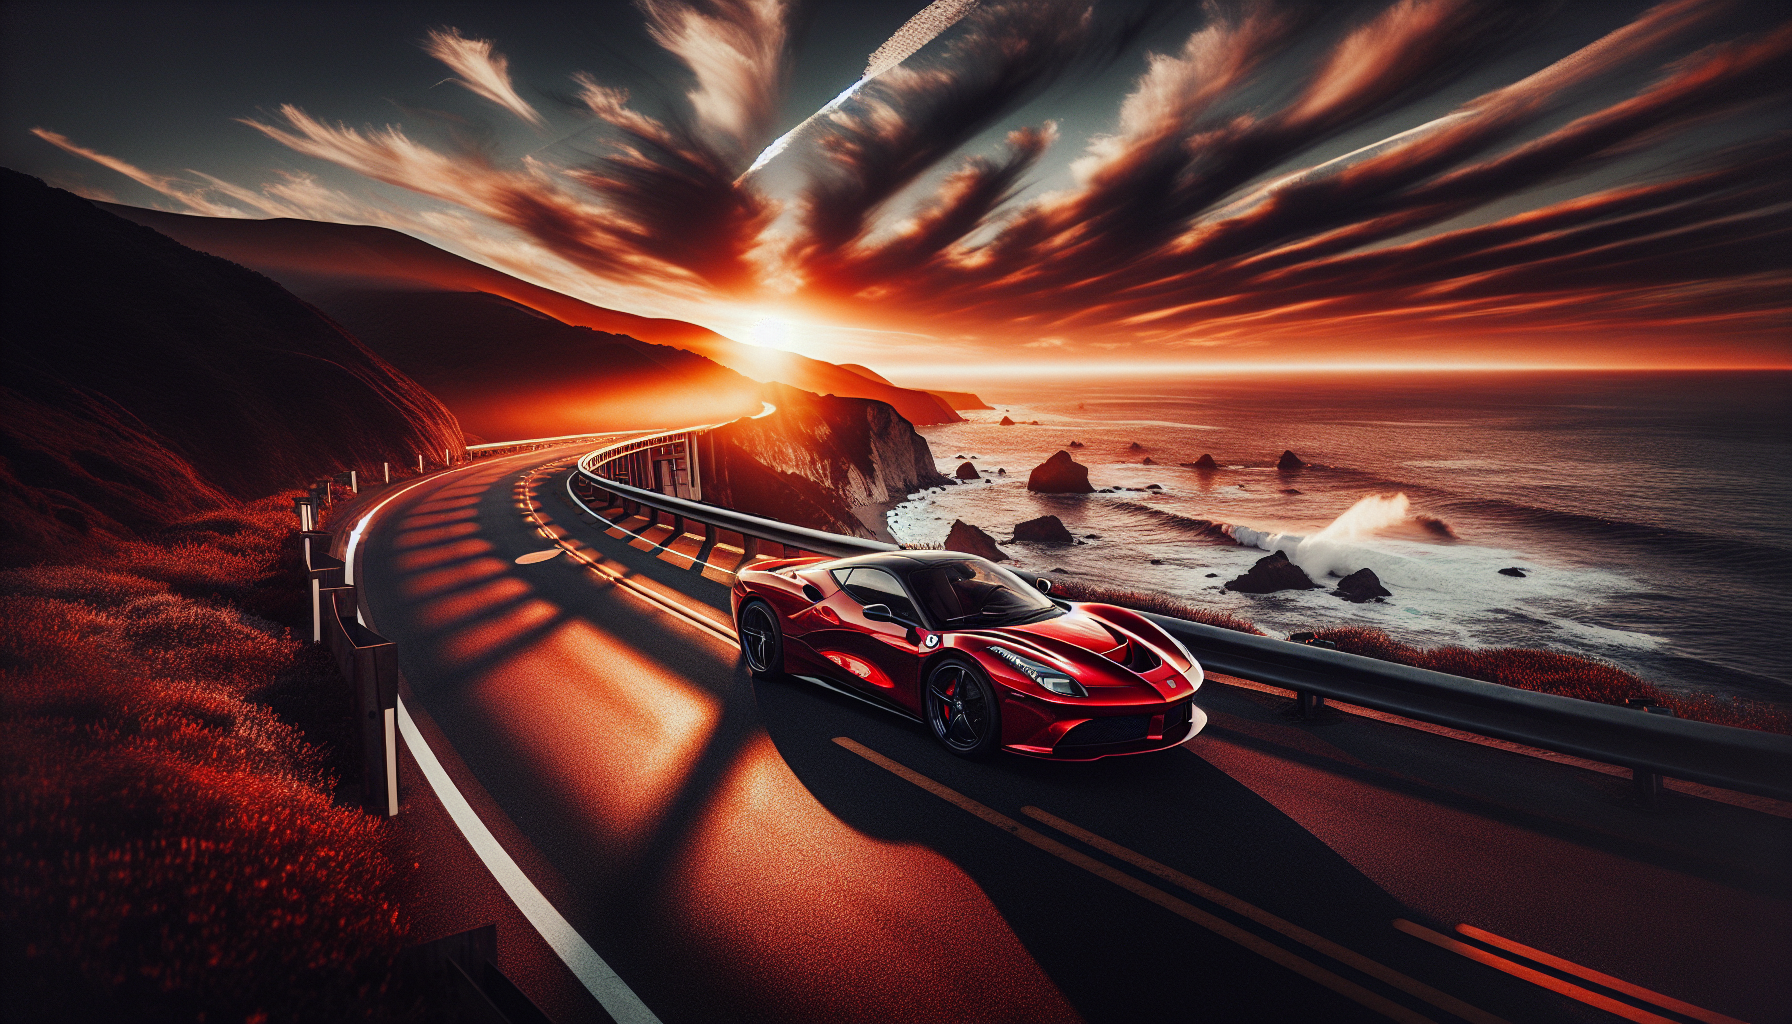

Below are some common parameters used in the OpenAI `images.generate` endpoint for the DALL-E 3 model:

1. **`model`**:
   - Specifies the DALL-E model to use.

2. **`prompt`**:
   - A text description of the image you want to generate.

3. **`n`**:
   - The number of images to generate.

4. **`size`**:
   - Specifies the resolution of the generated image.
   - Options include:
     - `"1024x1024"`: Square image.
     - `"1792x1024"`: Wide image.
     - `"1024x1792"`: Tall image.

5. **`quality`** (optional):
   - Specifies the quality of the generated image.
   - Options include:
     - `"standard"`: Standard quality.
     - `"hd"`: High-definition quality for more detailed images.

6. **`revised_prompt`** (output):
   - DALL-E 3 may revise your input prompt to better align with its understanding of the request.

By combining these parameters, we can generate highly customized and visually appealing images.

<span style="color: darkblue;">

A continuación, se presentan algunos parámetros comunes utilizados en el endpoint `images.generate` de OpenAI para el modelo DALL-E 3.

1. **`model`**:
   - Especifica el modelo DALL-E a utilizar.

2. **`prompt`**:
   - Una descripción en texto de la imagen que deseas generar.

3. **`n`**:
   - El número de imágenes a generar.

4. **`size`**:
   - Especifica la resolución de la imagen generada.
   - Las opciones incluyen:
     - `"1024x1024"`: Imagen cuadrada.
     - `"1792x1024"`: Imagen panorámica.
     - `"1024x1792"`: Imagen vertical.

5. **`quality`** (opcional):
   - Especifica la calidad de la imagen generada.
   - Las opciones incluyen:
     - `"standard"`: Calidad estándar.
     - `"hd"`: Alta definición para imágenes más detalladas.

6. **`revised_prompt`** (salida):
   - DALL-E 3 puede revisar tu solicitud para alinearla mejor con su comprensión.

Al combinar estos parámetros, podemos generar imágenes altamente personalizadas y visualmente atractivas.
</span>

The following cell is a simple example of OpenAI gpt-4o __Vision__ capability. We will pass the following image to the model and ask the model to describe the main subject in the image.


<span style="color: darkblue;">

La siguiente celda es un ejemplo simple de la capacidad de __visión__ de OpenAI gpt-4o. Pasaremos la siguiente imagen al modelo y le pediremos que describa el tema principal de la imagen.

</span>


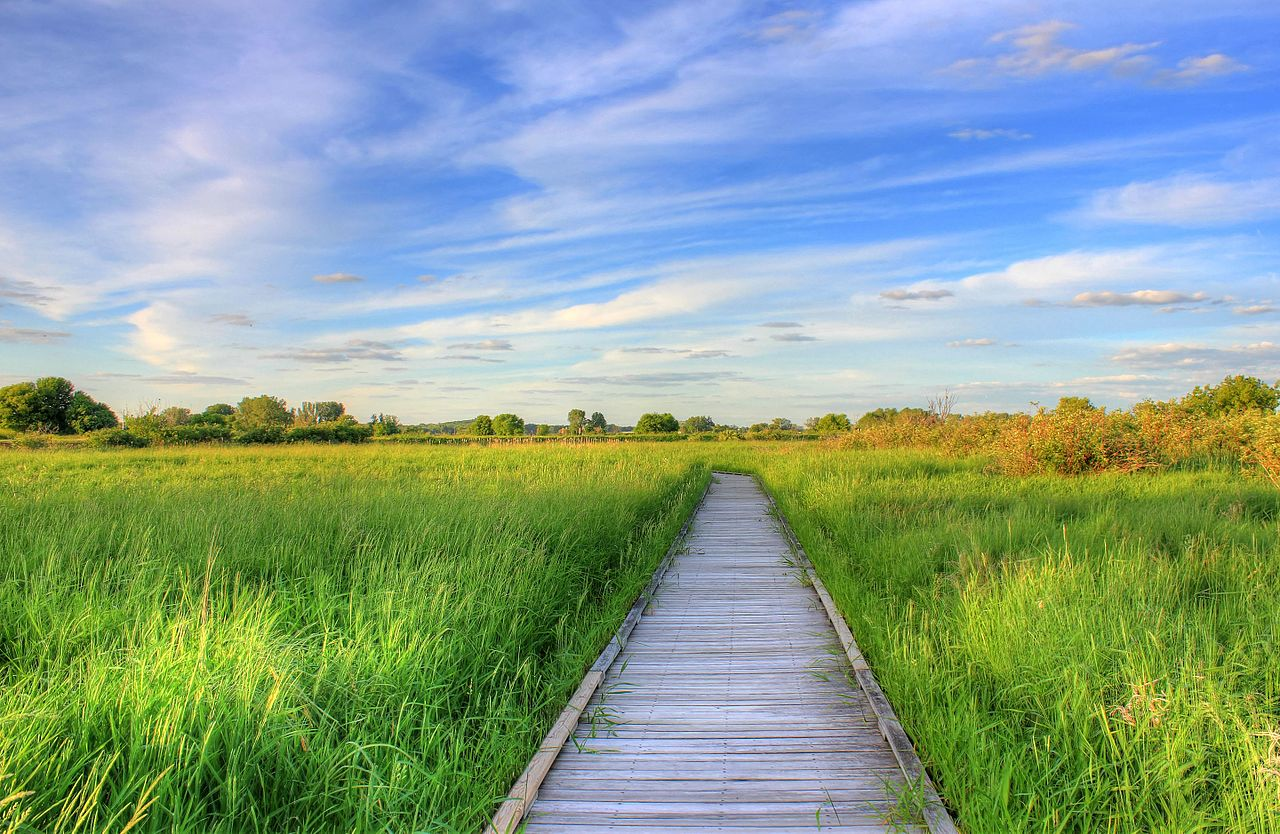


In [2]:
response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What is the main subject of this image?"},
        {
          "type": "image_url",
          "image_url": {
            "url": "https://upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Gfp-wisconsin-madison-the-nature-boardwalk.jpg/1280px-gfp-wisconsin-madison-the-nature-boardwalk.jpg",
          },
        },
      ],
    }
  ],
)
print(response.choices[0].message.content)

The main subject of the image is a pathway or boardwalk extending through a lush, green meadow under a bright blue sky.


The model understands the image perfectly, describing exactly what is seen in the image. Using DALL-E and GPT-4o with vision, we can create an image with DALL-E and have GPT-4o define or even make suggestions to improve the image.

Below are some common parameters used when utilizing the **vision capability** of GPT-4o:

1. **`model`**:
   - Specifies the GPT-4o model to use.
   - Example: `"gpt-4o"` (the current version of the model with vision capabilities).

2. **`messages`**:
   - A list of messages that define the conversation.

3. **`image_url`**:
   - Specifies the URL of the image to be analyzed.

4. **`temperature`** (optional):
   - Controls the randomness of the model's output.

5. **`max_tokens`** (optional):
   - Limits the maximum number of tokens (words or parts of words) in the response.

6. **`top_p`** (optional):
   - Controls the nucleus sampling, limiting the range of tokens considered for sampling.

7. **`frequency_penalty`** (optional):
   - Penalizes repeated phrases or tokens in the response.

8. **`presence_penalty`** (optional):
   - Encourages the model to explore new topics by penalizing tokens already present in the conversation.

<span style="color: darkblue;">

El modelo entiende perfectamente la imagen, describiendo exactamente lo que se ve en ella. Usando DALL-E y GPT-4o con visión, podemos crear una imagen con DALL-E y hacer que GPT-4o la defina o incluso haga sugerencias para mejorarla.

A continuación, se presentan algunos parámetros comunes utilizados al aprovechar la **capacidad de visión** de GPT-4o:

1. **`model`**:
   - Especifica el modelo GPT-4o a utilizar.
   - Ejemplo: `"gpt-4o"` (la versión actual del modelo con capacidades de visión).

2. **`messages`**:
   - Una lista de mensajes que definen la conversación.

3. **`image_url`**:
   - Especifica la URL de la imagen a analizar.

4. **`temperature`** (opcional):
   - Controla la aleatoriedad de la salida del modelo.

5. **`max_tokens`** (opcional):
   - Limita el número máximo de tokens (palabras o partes de palabras) en la respuesta.

6. **`top_p`** (opcional):
   - Controla el muestreo de núcleo, limitando el rango de tokens considerados para el muestreo.

7. **`frequency_penalty`** (opcional):
   - Penaliza frases o tokens repetidos en la respuesta.

8. **`presence_penalty`** (opcional):
   - Anima al modelo a explorar nuevos temas penalizando los tokens ya presentes en la conversación.
</span>

The following cell utilizes OpenAI's Text-to-Speech (TTS) API. This API takes text as input and converts it into natural sounding, human-like audio.

<span style="color: darkblue;">

La siguiente celda utiliza la API de Texto a Voz (TTS) de OpenAI. Esta API toma texto como entrada y lo convierte en audio natural y similar al humano.
</span>

In [ ]:
from pathlib import Path

response = client.audio.speech.create(
    model="tts-1", # or 'tts-1-hd' for higher quality
    voice="alloy", # Other voices: echo, fable, onyx, nova, shimmer
    input="Hello! I am an AI assistant created by OpenAI."
)

# The audio is streamed to a file
response.stream_to_file(Path("output.mp3"))

The resulting mp3 file sounds very realistic.

Below are some common parameters used in the OpenAI `audio.speech.create` endpoint for the TTS API:

1. **`model`**:
   - Specifies the TTS model to use.
   - Options include:
     - `"tts-1"`: Standard quality.
     - `"tts-1-hd"`: High-definition quality for more realistic and detailed audio.

2. **`voice`**:
   - Specifies the voice to use for the generated speech.
   - Available voices include:
     - `"alloy"`: A balanced, natural-sounding voice.
     - `"echo"`: A clear and articulate voice.
     - `"fable"`: A warm and engaging voice.
     - `"onyx"`: A deep and authoritative voice.
     - `"nova"`: A bright and cheerful voice.
     - `"shimmer"`: A soft and calming voice.

3. **`input`**:
   - The text to be converted into speech.
   - Example: `"Hello! I am an AI assistant created by OpenAI."`

4. **`response_format`** (optional):
   - Specifies the format of the audio output.
   - Common formats include:
     - `"mp3"`: Compressed audio format.
     - `"wav"`: Uncompressed audio format for higher quality.

5. **`stream_to_file`**:
   - Allows the audio output to be streamed directly to a file.

<span style="color: darkblue;">

El archivo mp3 resultante suena muy realista.

A continuación, se presentan algunos parámetros comunes utilizados en el endpoint `audio.speech.create` de OpenAI para la API de TTS:

1. **`model`**:
   - Especifica el modelo TTS a utilizar.
   - Opciones incluyen:
     - `"tts-1"`: Calidad estándar.
     - `"tts-1-hd"`: Calidad de alta definición para un audio más realista y detallado.

2. **`voice`**:
   - Especifica la voz a utilizar para el discurso generado.
   - Las voces disponibles incluyen:
     - `"alloy"`: Una voz equilibrada y natural.
     - `"echo"`: Una voz clara y articulada.
     - `"fable"`: Una voz cálida y atractiva.
     - `"onyx"`: Una voz profunda y autoritaria.
     - `"nova"`: Una voz brillante y alegre.
     - `"shimmer"`: Una voz suave y calmante.

3. **`input`**:
   - El texto que se convertirá en discurso.
   - Ejemplo: `"¡Hola! Soy un asistente de IA creado por OpenAI."`

4. **`response_format`** (opcional):
   - Especifica el formato de salida del audio.
   - Los formatos comunes incluyen:
     - `"mp3"`: Formato de audio comprimido.
     - `"wav"`: Formato de audio sin comprimir para mayor calidad.

5. **`stream_to_file`**:
   - Permite que la salida de audio se transmita directamente a un archivo.
</span>

__Conclusion__ 

OpenAI has some very interesting offerings and models. The power of combining these model creates thousands of possible applications and use cases. 

<span style="color: darkblue;">

__Conclusión__

OpenAI tiene algunas ofertas y modelos muy interesantes. El poder de combinar estos modelos crea miles de posibles aplicaciones y casos de uso.

</span>